## Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Load extracted feature data set

In [2]:
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'Unet-2-dog-w-augment-2021-07-25/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "uncompressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 3139)


,0,1,2,3,4,5,6,7,8,9,...,3129,3130,3131,3132,3133,3134,3135,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,0.0,3.909721,0.000000,5.583603,0.0,5.476412,0.0,1,563.673469
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,2.172515,0.000000,0.0,15.297228,2.0,1,621.235078
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.0,0.284720,0.000000,0.000000,0.0,5.846832,4.0,1,644.143823
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,9.453906,7.0,1,539.266118
-01-CON-D09-L.png,0.000000,9.426241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,10.841634,9.0,1,473.401923


In [3]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \
        wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
#print(feature_data)

## Read the clinical file for days until heal data

In [5]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  711.840000         1.000000   
-05-CON-D04-L.png            4.0          5  659.363853         0.926281   
-05-CON-D07-L.png            7.0          5  494.384766         0.694517   
-05-CON-D09-L.png            9.0          5  232.888889         0.327165   
-05-CON-D11-L.png           11.0          5  117.528889         0.165106   
-05-CON-D14-L.png           14.0          5   50.813802         0.071384   
-05-CON-D16-L.png           16.0          5   30.040816         0.042202   
-05-CON-D18-L.png           18.0          5   21.973333         0.030868   
-05-CON-D21-L.png           21.0          5    8.742756         0.012282   
-05-CON-D23-L.png           23.0          5    4.128086         0.005799   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    0.000000         0.000000   
-05-CON-D30-

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


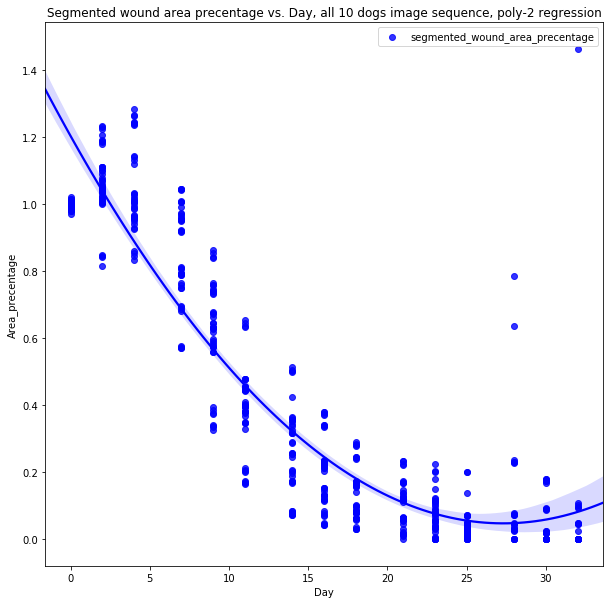

In [7]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

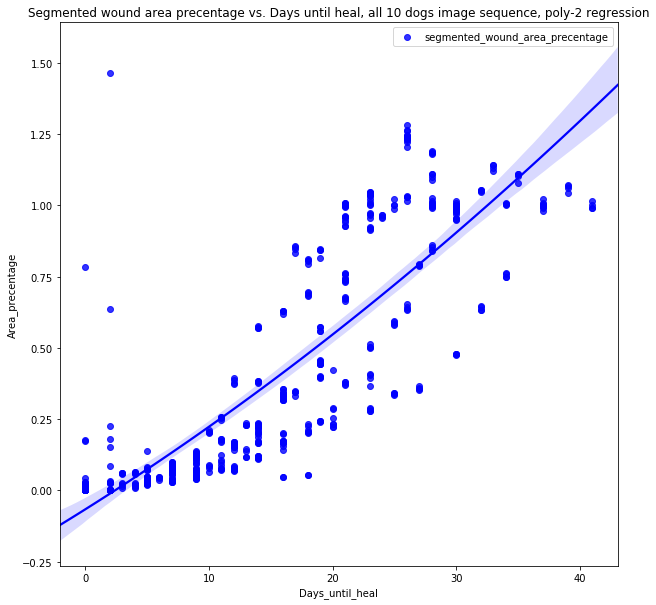

In [8]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [9]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9,10]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9, 10]


### Part 1
Train the GPR on the 1-8 dog wound image sequence

In [10]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
X_train = X_train.drop(['Day'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
X_test = X_test.drop(['Day'], axis = 1)
#print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 3138)
The test wound image sequence's days:
 -09-CON-D00-R.png              0.0
-09-CON-D02-R.png              2.0
-09-CON-D04-R.png              4.0
-09-CON-D07-R.png              7.0
-09-CON-D09-R.png              9.0
-09-CON-D11-R.png             11.0
-09-CON-D14-R.png             14.0
-09-CON-D16-R.png             16.0
-09-CON-D18-R.png             18.0
-09-CON-D21-R.png             21.0
-09-CON-D23-R.png             23.0
-09-CON-D25-R.png             25.0
-09-CON-D28-R.png             28.0
-09-CON-D30-R.png             30.0
-10-CON-D00-R.png              0.0
-10-CON-D02-R.png              2.0
-10-CON-D04-R.png              4.0
-10-CON-D07-R.png              7.0
-10-CON-D09-R.png              9.0
-10-CON-D11-R.png             11.0
-10-CON-D14-R.png             14.0
-10-CON-D16-R.png             16.0
-10-CON-D18-R.png             18.0
-10-CON-D21-R.png             21.0
-10-CON-D23-R.png             23.0
-10-CON-D25-R.png             25.0
rotat

In [11]:
#X_train.head(5)

### Part 2
Train the GPR on all dog wound image sequences' (1 - 10) day 1-15 sequences.
Predict all all dog wound image sequences' (1 - 10) day 16-32 sequences.

In [12]:
# 2. use the < 16 days image sequence as training input and > 16 days image sequence as test input
# Train
#X_train = feature_data[feature_data['Day'].isin(range(0,16))]
#X_train = X_train.drop(['Dog_label','Area_mm2'], axis = 1)

#X_test = feature_data[feature_data['Day'].isin(range(16,35))]
#X_test = X_test[X_test['Dog_label'].isin([test_num])]

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
#X_test = X_test.drop(['Dog_label','Area_mm2'], axis = 1)
# Label
#Y_train = wound_area_df[wound_area_df['Day'].isin(range(0,16))]
#Y_train = Y_train['Area_precentage']

#Y_test = wound_area_df[wound_area_df['Day'].isin(range(16, 35))]
#Y_test = Y_test[Y_test['Dog_label'].isin([test_num])]

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
#Y_test = Y_test['Area_precentage']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 or 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
#print("The test wound image sequence's days:\n", days_seq)

## XGBoost Regression
Define the XGBoost Regression object.

### Random search for XGB regressor

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 60)]
#max_depth.append(None)

# Learning rate
learning_rate = [0.01, 0.03, 0.05, 0.07, 0.1]

# Minimum sum of insatnce weight needed in a child
min_child_weight = [2,4,6,8,10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'min_child_weight': min_child_weight
              }
print(random_grid)

{'max_depth': [1, 2, 4, 6, 8, 10, 12, 13, 15, 17, 19, 21, 23, 25, 26, 28, 30, 32, 34, 36, 37, 39, 41, 43, 45, 47, 49, 50, 52, 54, 56, 58, 60, 61, 63, 65, 67, 69, 71, 73, 74, 76, 78, 80, 82, 84, 85, 87, 89, 91, 93, 95, 97, 98, 100, 102, 104, 106, 108, 110], 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1], 'min_child_weight': [2, 4, 6, 8, 10]}


In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rs = XGBRegressor(random_state=r_seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rs_random = RandomizedSearchCV(estimator = rs, param_distributions = random_grid, n_iter = 200, cv = num_cv, verbose=2, random_state=r_seed, n_jobs = -1)
# Fit the random search model
rs_random.fit(X_train, Y_train)
print(rs_random.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] max_depth=91, n_estimators=1000, learning_rate=0.07, min_child_weight=10 
[CV] max_depth=91, n_estimators=1000, learning_rate=0.07, min_child_weight=10 
[CV] max_depth=91, n_estimators=1000, learning_rate=0.07, min_child_weight=10 
[CV] max_depth=91, n_estimators=1000, learning_rate=0.07, min_child_weight=10 
[CV] max_depth=91, n_estimators=1000, learning_rate=0.07, min_child_weight=10 
[CV] max_depth=17, n_estimators=560, learning_rate=0.05, min_child_weight=6 
[CV] max_depth=17, n_estimators=560, learning_rate=0.05, min_child_weight=6 
[CV] max_depth=17, n_estimators=560, learning_rate=0.05, min_child_weight=6 
[CV]  max_depth=17, n_estimators=560, learning_rate=0.05, min_child_weight=6, total= 1.8min
[CV] max_depth=17, n_estimators=560, learning_rate=0.05, min_child_weight=6 
[CV]  max_depth=17, n_estimators=560, learning_rate=0.05, min_child_weight=6, total= 1.8min
[CV] max_depth=17, n_estimators=560, learning_rat

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.6min


[CV]  max_depth=1, n_estimators=780, learning_rate=0.03, min_child_weight=4, total=  11.8s
[CV] max_depth=1, n_estimators=780, learning_rate=0.03, min_child_weight=4 
[CV]  max_depth=43, n_estimators=780, learning_rate=0.1, min_child_weight=4, total= 1.5min
[CV] max_depth=1, n_estimators=780, learning_rate=0.03, min_child_weight=4 
[CV]  max_depth=1, n_estimators=780, learning_rate=0.03, min_child_weight=4, total=  11.7s
[CV] max_depth=28, n_estimators=120, learning_rate=0.03, min_child_weight=8 
[CV]  max_depth=1, n_estimators=780, learning_rate=0.03, min_child_weight=4, total=  11.9s
[CV] max_depth=28, n_estimators=120, learning_rate=0.03, min_child_weight=8 
[CV]  max_depth=1, n_estimators=780, learning_rate=0.03, min_child_weight=4, total=  11.7s
[CV] max_depth=28, n_estimators=120, learning_rate=0.03, min_child_weight=8 
[CV]  max_depth=28, n_estimators=120, learning_rate=0.03, min_child_weight=8, total=  12.4s
[CV] max_depth=28, n_estimators=120, learning_rate=0.03, min_child_wei

[CV] max_depth=50, n_estimators=1000, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=26, n_estimators=560, learning_rate=0.05, min_child_weight=2, total= 1.4min
[CV] max_depth=50, n_estimators=1000, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=36, n_estimators=890, learning_rate=0.05, min_child_weight=6, total= 2.8min
[CV] max_depth=50, n_estimators=1000, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=36, n_estimators=890, learning_rate=0.05, min_child_weight=6, total= 3.2min
[CV] max_depth=50, n_estimators=1000, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=36, n_estimators=890, learning_rate=0.05, min_child_weight=6, total= 3.6min
[CV] max_depth=78, n_estimators=1000, learning_rate=0.07, min_child_weight=4 
[CV]  max_depth=36, n_estimators=890, learning_rate=0.05, min_child_weight=6, total= 3.0min
[CV] max_depth=78, n_estimators=1000, learning_rate=0.07, min_child_weight=4 
[CV]  max_depth=36, n_estimators=890, learning_rate=0.05, min_child_

[CV]  max_depth=69, n_estimators=1000, learning_rate=0.01, min_child_weight=8, total= 2.9min
[CV] max_depth=36, n_estimators=560, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=65, n_estimators=560, learning_rate=0.01, min_child_weight=10, total= 1.1min
[CV] max_depth=36, n_estimators=560, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=6, n_estimators=1000, learning_rate=0.01, min_child_weight=4, total= 1.3min
[CV] max_depth=36, n_estimators=560, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=6, n_estimators=1000, learning_rate=0.01, min_child_weight=4, total= 1.3min
[CV] max_depth=36, n_estimators=560, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=65, n_estimators=560, learning_rate=0.01, min_child_weight=10, total= 1.1min
[CV] max_depth=36, n_estimators=560, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=65, n_estimators=560, learning_rate=0.01, min_child_weight=10, total= 1.1min
[CV] max_depth=30, n_estimators=10, learning_rate=0.05, min

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 23.0min


[CV]  max_depth=104, n_estimators=1000, learning_rate=0.07, min_child_weight=2, total=  54.9s
[CV] max_depth=37, n_estimators=1000, learning_rate=0.01, min_child_weight=8 
[CV]  max_depth=104, n_estimators=1000, learning_rate=0.07, min_child_weight=2, total= 1.1min
[CV] max_depth=104, n_estimators=890, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=67, n_estimators=670, learning_rate=0.05, min_child_weight=6, total= 2.7min
[CV] max_depth=104, n_estimators=890, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=67, n_estimators=670, learning_rate=0.05, min_child_weight=6, total= 2.7min
[CV] max_depth=104, n_estimators=890, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=37, n_estimators=1000, learning_rate=0.01, min_child_weight=8, total= 2.7min
[CV] max_depth=104, n_estimators=890, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=37, n_estimators=1000, learning_rate=0.01, min_child_weight=8, total= 2.8min
[CV] max_depth=104, n_estimators=890, learning_r

[CV]  max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10, total=   0.9s
[CV] max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10 
[CV]  max_depth=82, n_estimators=230, learning_rate=0.1, min_child_weight=8, total=  51.3s
[CV] max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10 
[CV]  max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10, total=   0.9s
[CV] max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10 
[CV]  max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10, total=   0.9s
[CV] max_depth=80, n_estimators=1000, learning_rate=0.03, min_child_weight=4 
[CV]  max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10, total=   0.9s
[CV] max_depth=80, n_estimators=1000, learning_rate=0.03, min_child_weight=4 
[CV]  max_depth=34, n_estimators=10, learning_rate=0.07, min_child_weight=10, total=   0.8s
[CV] max_depth=80, n_estimators=1000, learning_rate=0.03, min_

[CV] max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2, total=  36.2s
[CV] max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=13, n_estimators=780, learning_rate=0.01, min_child_weight=8, total= 1.7min
[CV] max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=13, n_estimators=780, learning_rate=0.01, min_child_weight=8, total= 1.7min
[CV] max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2, total=  40.1s
[CV] max_depth=52, n_estimators=230, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=34, n_estimators=670, learning_rate=0.03, min_child_weight=10, total= 2.1min
[CV] max_depth=50, n_estimators=340, learning_rate=0.01, min_child_weight=6 
[CV]  max_depth=34, n_estimators=670, learning_rate=0.03, min_child_weight=10, total

[CV]  max_depth=106, n_estimators=780, learning_rate=0.1, min_child_weight=4, total= 1.4min
[CV] max_depth=89, n_estimators=450, learning_rate=0.1, min_child_weight=6 
[CV]  max_depth=106, n_estimators=780, learning_rate=0.1, min_child_weight=4, total= 1.3min
[CV] max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6, total=   6.6s
[CV] max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6, total=   6.7s
[CV] max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6, total=   6.6s
[CV] max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight=6, total=   6.7s
[CV] max_depth=1, n_estimators=450, learning_rate=0.03, min_child_weight

[CV]  max_depth=87, n_estimators=890, learning_rate=0.05, min_child_weight=4, total= 2.4min
[CV] max_depth=17, n_estimators=890, learning_rate=0.07, min_child_weight=6 
[CV]  max_depth=87, n_estimators=890, learning_rate=0.05, min_child_weight=4, total= 2.4min
[CV] max_depth=17, n_estimators=890, learning_rate=0.07, min_child_weight=6 
[CV]  max_depth=87, n_estimators=890, learning_rate=0.05, min_child_weight=4, total= 2.6min
[CV] max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6 
[CV]  max_depth=87, n_estimators=890, learning_rate=0.05, min_child_weight=4, total= 2.4min
[CV] max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6 
[CV]  max_depth=17, n_estimators=890, learning_rate=0.07, min_child_weight=6, total= 1.8min
[CV] max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6 
[CV]  max_depth=87, n_estimators=890, learning_rate=0.05, min_child_weight=4, total= 3.0min
[CV] max_depth=100, n_estimators=450, learning_rate=0.07, mi

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 58.2min


[CV]  max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6, total= 1.7min
[CV] max_depth=52, n_estimators=780, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6, total= 1.9min
[CV] max_depth=52, n_estimators=780, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=17, n_estimators=890, learning_rate=0.07, min_child_weight=6, total= 2.2min
[CV] max_depth=52, n_estimators=780, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6, total= 1.9min
[CV] max_depth=56, n_estimators=450, learning_rate=0.07, min_child_weight=2 
[CV]  max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6, total= 1.8min
[CV] max_depth=56, n_estimators=450, learning_rate=0.07, min_child_weight=2 
[CV]  max_depth=100, n_estimators=450, learning_rate=0.07, min_child_weight=6, total= 1.9min
[CV] max_depth=56, n_estimators=450, learning_rate=0.07, m

[CV] max_depth=106, n_estimators=1000, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=82, n_estimators=670, learning_rate=0.01, min_child_weight=4, total= 1.5min
[CV] max_depth=106, n_estimators=1000, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=82, n_estimators=670, learning_rate=0.01, min_child_weight=4, total= 1.5min
[CV] max_depth=106, n_estimators=1000, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=102, n_estimators=560, learning_rate=0.1, min_child_weight=10, total= 1.9min
[CV] max_depth=106, n_estimators=1000, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=102, n_estimators=560, learning_rate=0.1, min_child_weight=10, total= 2.0min
[CV] max_depth=106, n_estimators=1000, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=102, n_estimators=560, learning_rate=0.1, min_child_weight=10, total= 1.9min
[CV] max_depth=37, n_estimators=450, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=102, n_estimators=560, learning_rate=0.1, min_chi

[CV]  max_depth=60, n_estimators=1000, learning_rate=0.03, min_child_weight=2, total= 2.4min
[CV] max_depth=100, n_estimators=1000, learning_rate=0.07, min_child_weight=8 
[CV]  max_depth=17, n_estimators=230, learning_rate=0.1, min_child_weight=6, total=  44.3s
[CV] max_depth=25, n_estimators=120, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=17, n_estimators=230, learning_rate=0.1, min_child_weight=6, total=  44.8s
[CV] max_depth=25, n_estimators=120, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=47, n_estimators=340, learning_rate=0.1, min_child_weight=8, total= 1.3min
[CV] max_depth=25, n_estimators=120, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=25, n_estimators=120, learning_rate=0.05, min_child_weight=4, total=  15.9s
[CV] max_depth=25, n_estimators=120, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=25, n_estimators=120, learning_rate=0.05, min_child_weight=4, total=  16.2s
[CV] max_depth=25, n_estimators=120, learning_rate=0.05, min_ch

[CV] max_depth=36, n_estimators=780, learning_rate=0.07, min_child_weight=8 
[CV]  max_depth=26, n_estimators=890, learning_rate=0.03, min_child_weight=2, total= 2.3min
[CV] max_depth=36, n_estimators=780, learning_rate=0.07, min_child_weight=8 
[CV]  max_depth=26, n_estimators=890, learning_rate=0.03, min_child_weight=2, total= 2.0min
[CV] max_depth=36, n_estimators=780, learning_rate=0.07, min_child_weight=8 
[CV]  max_depth=26, n_estimators=890, learning_rate=0.03, min_child_weight=2, total= 2.1min
[CV] max_depth=104, n_estimators=560, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=26, n_estimators=890, learning_rate=0.03, min_child_weight=2, total= 1.8min
[CV] max_depth=104, n_estimators=560, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=26, n_estimators=890, learning_rate=0.03, min_child_weight=2, total= 2.3min
[CV] max_depth=104, n_estimators=560, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=36, n_estimators=780, learning_rate=0.07, min_child_weight=

[CV]  max_depth=25, n_estimators=120, learning_rate=0.03, min_child_weight=2, total=  14.6s
[CV] max_depth=84, n_estimators=890, learning_rate=0.01, min_child_weight=8 
[CV]  max_depth=25, n_estimators=120, learning_rate=0.03, min_child_weight=2, total=  14.3s
[CV] max_depth=84, n_estimators=890, learning_rate=0.01, min_child_weight=8 
[CV]  max_depth=49, n_estimators=340, learning_rate=0.05, min_child_weight=8, total= 1.1min
[CV] max_depth=84, n_estimators=890, learning_rate=0.01, min_child_weight=8 
[CV]  max_depth=49, n_estimators=340, learning_rate=0.05, min_child_weight=8, total= 1.1min
[CV] max_depth=84, n_estimators=890, learning_rate=0.01, min_child_weight=8 
[CV]  max_depth=49, n_estimators=340, learning_rate=0.05, min_child_weight=8, total= 1.1min
[CV] max_depth=23, n_estimators=340, learning_rate=0.03, min_child_weight=6 
[CV]  max_depth=85, n_estimators=1000, learning_rate=0.01, min_child_weight=4, total= 3.0min
[CV] max_depth=23, n_estimators=340, learning_rate=0.03, min_c

[CV] max_depth=21, n_estimators=450, learning_rate=0.1, min_child_weight=10 
[CV]  max_depth=80, n_estimators=560, learning_rate=0.03, min_child_weight=2, total= 1.7min
[CV] max_depth=61, n_estimators=340, learning_rate=0.1, min_child_weight=6 
[CV]  max_depth=80, n_estimators=560, learning_rate=0.03, min_child_weight=2, total= 1.6min
[CV] max_depth=61, n_estimators=340, learning_rate=0.1, min_child_weight=6 
[CV]  max_depth=21, n_estimators=450, learning_rate=0.1, min_child_weight=10, total= 1.5min
[CV] max_depth=61, n_estimators=340, learning_rate=0.1, min_child_weight=6 
[CV]  max_depth=21, n_estimators=450, learning_rate=0.1, min_child_weight=10, total= 1.5min
[CV] max_depth=61, n_estimators=340, learning_rate=0.1, min_child_weight=6 
[CV]  max_depth=21, n_estimators=450, learning_rate=0.1, min_child_weight=10, total= 1.6min
[CV] max_depth=61, n_estimators=340, learning_rate=0.1, min_child_weight=6 
[CV]  max_depth=80, n_estimators=560, learning_rate=0.03, min_child_weight=2, total

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 111.2min


[CV]  max_depth=4, n_estimators=340, learning_rate=0.07, min_child_weight=6, total=  18.3s
[CV] max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=4, n_estimators=340, learning_rate=0.07, min_child_weight=6, total=  18.1s
[CV] max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=4, n_estimators=340, learning_rate=0.07, min_child_weight=6, total=  18.4s
[CV] max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=50, n_estimators=780, learning_rate=0.03, min_child_weight=8, total= 2.7min
[CV] max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10, total= 1.4min
[CV] max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10 
[CV]  max_depth=69, n_estimators=450, learning_rate=0.05, min_child_weight=10, total= 1.5min
[CV] max_depth=54, n_estimators=1000, learning_rate=0.01, m

[CV] max_depth=37, n_estimators=670, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=19, n_estimators=1000, learning_rate=0.03, min_child_weight=4, total= 3.4min
[CV] max_depth=37, n_estimators=670, learning_rate=0.01, min_child_weight=2 
[CV]  max_depth=10, n_estimators=780, learning_rate=0.03, min_child_weight=10, total= 1.6min
[CV] max_depth=102, n_estimators=120, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=102, n_estimators=120, learning_rate=0.01, min_child_weight=10, total=  10.0s
[CV] max_depth=102, n_estimators=120, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=19, n_estimators=1000, learning_rate=0.03, min_child_weight=4, total= 3.5min
[CV] max_depth=102, n_estimators=120, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=102, n_estimators=120, learning_rate=0.01, min_child_weight=10, total=  10.1s
[CV] max_depth=102, n_estimators=120, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=10, n_estimators=780, learning_rate=0.03, min_c

[CV] max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10, total=   0.9s
[CV] max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10, total=   0.8s
[CV] max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10 
[CV]  max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10, total=   0.9s
[CV] max_depth=19, n_estimators=450, learning_rate=0.1, min_child_weight=8 
[CV]  max_depth=10, n_estimators=10, learning_rate=0.01, min_child_weight=10, total=   0.9s
[CV] max_depth=19, n_estimators=450, learning_rate=0.1, min_child_weight=8 
[CV]  max_depth=10, n_estimators=780, learning_rate=0.1, min_child_weight=8, total= 1.5min
[CV] max_depth=19, n_estimators=450, learning_rate=0.1, min_child_weight=8 
[CV]  max_depth=87, n_estimators=780, learning_rate=0.01, min_child_weight=2, tota

[CV] max_depth=73, n_estimators=450, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=36, n_estimators=890, learning_rate=0.1, min_child_weight=10, total= 2.7min
[CV] max_depth=73, n_estimators=450, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=12, n_estimators=230, learning_rate=0.07, min_child_weight=6, total=  33.3s
[CV] max_depth=73, n_estimators=450, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=12, n_estimators=230, learning_rate=0.07, min_child_weight=6, total=  32.9s
[CV] max_depth=73, n_estimators=450, learning_rate=0.05, min_child_weight=4 
[CV]  max_depth=12, n_estimators=230, learning_rate=0.07, min_child_weight=6, total=  32.8s
[CV] max_depth=1, n_estimators=780, learning_rate=0.07, min_child_weight=8 
[CV]  max_depth=1, n_estimators=780, learning_rate=0.07, min_child_weight=8, total=  11.6s
[CV] max_depth=1, n_estimators=780, learning_rate=0.07, min_child_weight=8 
[CV]  max_depth=84, n_estimators=340, learning_rate=0.05, min_child_weight=6, tot

[CV]  max_depth=60, n_estimators=670, learning_rate=0.1, min_child_weight=6, total= 1.7min
[CV] max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4, total=  11.5s
[CV] max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=60, n_estimators=670, learning_rate=0.1, min_child_weight=6, total= 2.0min
[CV] max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4, total=  11.7s
[CV] max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=60, n_estimators=670, learning_rate=0.1, min_child_weight=6, total= 1.9min
[CV] max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=60, n_estimators=120, learning_rate=0.01, min_child_weight=4, total=  11.6s
[CV] max_depth=93, n_estimators=1000, learning_rate=0.1, min_child

[CV] max_depth=106, n_estimators=450, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=58, n_estimators=560, learning_rate=0.1, min_child_weight=2, total=  45.4s
[CV] max_depth=106, n_estimators=450, learning_rate=0.01, min_child_weight=4 
[CV]  max_depth=58, n_estimators=560, learning_rate=0.1, min_child_weight=2, total=  42.3s
[CV] max_depth=39, n_estimators=670, learning_rate=0.07, min_child_weight=2 
[CV]  max_depth=58, n_estimators=560, learning_rate=0.1, min_child_weight=2, total=  40.0s
[CV] max_depth=39, n_estimators=670, learning_rate=0.07, min_child_weight=2 
[CV]  max_depth=58, n_estimators=560, learning_rate=0.1, min_child_weight=2, total=  45.5s
[CV] max_depth=39, n_estimators=670, learning_rate=0.07, min_child_weight=2 
[CV]  max_depth=106, n_estimators=450, learning_rate=0.01, min_child_weight=4, total=  55.0s
[CV] max_depth=39, n_estimators=670, learning_rate=0.07, min_child_weight=2 
[CV]  max_depth=106, n_estimators=450, learning_rate=0.01, min_child_weight=4, 

[CV]  max_depth=97, n_estimators=450, learning_rate=0.05, min_child_weight=8, total= 1.6min
[CV] max_depth=43, n_estimators=1000, learning_rate=0.03, min_child_weight=8 
[CV]  max_depth=58, n_estimators=890, learning_rate=0.05, min_child_weight=8, total= 3.0min
[CV] max_depth=43, n_estimators=1000, learning_rate=0.03, min_child_weight=8 
[CV]  max_depth=58, n_estimators=890, learning_rate=0.05, min_child_weight=8, total= 3.2min
[CV] max_depth=43, n_estimators=1000, learning_rate=0.03, min_child_weight=8 
[CV]  max_depth=58, n_estimators=890, learning_rate=0.05, min_child_weight=8, total= 3.3min
[CV] max_depth=110, n_estimators=340, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=58, n_estimators=890, learning_rate=0.05, min_child_weight=8, total= 3.5min
[CV] max_depth=110, n_estimators=340, learning_rate=0.1, min_child_weight=2 
[CV]  max_depth=58, n_estimators=890, learning_rate=0.05, min_child_weight=8, total= 3.3min
[CV] max_depth=110, n_estimators=340, learning_rate=0.1, min

[CV] max_depth=26, n_estimators=560, learning_rate=0.03, min_child_weight=10 
[CV]  max_depth=50, n_estimators=120, learning_rate=0.07, min_child_weight=8, total=  18.4s
[CV] max_depth=26, n_estimators=560, learning_rate=0.03, min_child_weight=10 
[CV]  max_depth=50, n_estimators=120, learning_rate=0.07, min_child_weight=8, total=  18.2s
[CV] max_depth=26, n_estimators=560, learning_rate=0.03, min_child_weight=10 
[CV]  max_depth=50, n_estimators=120, learning_rate=0.07, min_child_weight=8, total=  18.3s
[CV] max_depth=26, n_estimators=560, learning_rate=0.03, min_child_weight=10 
[CV]  max_depth=50, n_estimators=120, learning_rate=0.07, min_child_weight=8, total=  20.2s
[CV] max_depth=26, n_estimators=560, learning_rate=0.03, min_child_weight=10 
[CV]  max_depth=50, n_estimators=120, learning_rate=0.07, min_child_weight=8, total=  18.9s
[CV] max_depth=2, n_estimators=340, learning_rate=0.07, min_child_weight=6 
[CV]  max_depth=23, n_estimators=560, learning_rate=0.07, min_child_weight

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 173.6min finished


{'max_depth': 58, 'n_estimators': 890, 'learning_rate': 0.05, 'min_child_weight': 8}


### Grid search for XGB regressor

In [15]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'learning_rate': [0.04, 0.05, 0.06], #so called `eta` value
              'max_depth': [57, 58, 59],
              'min_child_weight': [7,8,9],
              'silent': [1],
              'n_estimators': [int(x) for x in range(840, 940, 10)]}
]
gp = XGBRegressor(random_state=r_seed)

# print parameters
print(gp.get_params())

# scores for regression
#
#Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
#'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 
#'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 
#'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 
#'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
#'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
#'roc_auc', 'v_measure_score']

grid_gp = GridSearchCV(estimator = gp, cv=num_cv, param_grid=param_grid, n_jobs=-1, scoring = 'r2', verbose=2)
grid_gp.fit(X_train, Y_train)

print(grid_gp.best_params_)
gp = grid_gp.best_estimator_

print("The CV results are: ", grid_gp.best_score_)

# Make the prediction on test set.
Y_pred = gp.predict(X_test)
#print(Y_pred)

{'reg_lambda': 1, 'gamma': 0, 'objective': 'reg:linear', 'min_child_weight': 1, 'max_depth': 3, 'silent': True, 'n_estimators': 100, 'reg_alpha': 0, 'missing': None, 'colsample_bytree': 1, 'max_delta_step': 0, 'colsample_bylevel': 1, 'seed': None, 'subsample': 1, 'scale_pos_weight': 1, 'base_score': 0.5, 'n_jobs': 1, 'random_state': 42, 'learning_rate': 0.1, 'booster': 'gbtree', 'nthread': None}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7 
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7 
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7 
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7 
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7 
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=7 
[CV] max_depth=

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.4min


[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=7, total= 3.5min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=7, total= 3.6min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=7, total= 3.6min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=7, total= 3.5min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=7, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_est

[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=870, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=8, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=8, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=8, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_esti

[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=860, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=860, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=870, min_child_weight=9, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=860, min_child_weight=9, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=870, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_est

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 62.8min


[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=7, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9, total= 3.5min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_est

[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=7, total= 3.5min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=7, total= 3.7min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=7, total= 3.7min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=7, total= 3.6min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=7, total= 3.6min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_esti

[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=8, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=8, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=8, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=8, total= 3.5min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=8, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_est

[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=9, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=9, total= 3.1min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.04, n_esti

[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=7, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=7, total= 3.5min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=890, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=7, total= 3.6min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=7, total= 3.5min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=880, min_child_weight=7, total= 3.5min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=900, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_est

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 147.4min


[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=8, total= 3.0min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=7, total= 3.6min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=8, total= 3.2min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=850, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=8, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=860, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=8, total= 3.2min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=860, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_est

[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=8, total= 3.5min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=8, total= 3.4min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=8, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=8, total= 3.6min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=840, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=8, total= 3.5min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_esti

[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=910, min_child_weight=9, total= 3.4min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_estimators=920, min_child_weight=9, total= 3.2min
[CV] max_depth=59, silent=1, learning_rate=0.04, n_estimators=930, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.04, n_est

[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 2.9min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 3.5min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=7, total= 2.9min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_esti

[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_est

[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=9, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=9, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.05, n_esti

[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 2.8min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_est

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 261.3min


[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=7, total= 2.9min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=7, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=7, total= 3.5min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_est

[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=8, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=8, total= 3.0min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_esti

[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9, total= 3.0min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=890, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9, total= 3.1min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=9, total= 3.1min
[CV] max_depth=58, silent=1, learning_rate=0.05, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.05, n_est

[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 3.2min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=7, total= 2.8min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=7, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=7, total= 3.4min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=7, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_esti

[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=8, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=8, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=8, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=8, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=8, total= 2.9min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_est

[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=930, min_child_weight=8, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=840, min_child_weight=9, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=850, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=840, min_child_weight=9, total= 3.0min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=840, min_child_weight=9, total= 2.9min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_estimators=860, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=840, min_child_weight=9, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.05, n_esti

[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=920, min_child_weight=9, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=930, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=930, min_child_weight=9, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_estimators=930, min_child_weight=9, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.05, n_est

[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=7, total= 2.8min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=7, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_esti

[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 2.8min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 3.4min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=8 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_est

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 405.0min


[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=8, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=8, total= 3.0min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=9, total= 2.7min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=8, total= 3.2min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=9, total= 3.1min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_est

[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=9, total= 3.3min
[CV] max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=9 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=9, total= 3.0min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=9, total= 3.1min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=9, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=7 
[CV]  max_depth=57, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=9, total= 2.9min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_esti

[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 2.8min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=7, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 3.3min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=920, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 2.8min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=7, total= 3.0min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=7 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_est

[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=890, min_child_weight=8, total= 2.9min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=890, min_child_weight=8, total= 3.1min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 2.8min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 3.4min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=910, min_child_weight=8 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=8, total= 3.0min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_esti

[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=890, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=9, total= 2.9min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=9, total= 3.0min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=890, min_child_weight=9, total= 2.8min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=9, total= 3.2min
[CV] max_depth=58, silent=1, learning_rate=0.06, n_estimators=900, min_child_weight=9 
[CV]  max_depth=58, silent=1, learning_rate=0.06, n_est

[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=7, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=7, total= 2.8min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=7, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=890, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=7, total= 3.0min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=890, min_child_weight=7 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=7, total= 2.8min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_esti

[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=8, total= 2.9min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=8, total= 2.8min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=8, total= 3.0min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=8, total= 3.3min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=870, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=8, total= 2.9min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=880, min_child_weight=8 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_est

[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=9, total= 2.8min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=9, total= 2.9min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=840, min_child_weight=9, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9, total= 2.7min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_estimators=860, min_child_weight=9 
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=850, min_child_weight=9, total= 3.1min
[CV] max_depth=59, silent=1, learning_rate=0.06, n_esti

[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=9, total= 2.5min
[CV]  max_depth=59, silent=1, learning_rate=0.06, n_estimators=930, min_child_weight=9, total= 2.4min


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 537.7min finished


{'max_depth': 57, 'silent': 1, 'learning_rate': 0.04, 'n_estimators': 930, 'min_child_weight': 7}
The CV results are:  0.8665612411674064


In [16]:
#print("coefficients of training data points (features) in kernel space\n", gp.alpha_)

In [17]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

-10-CON-D00-R.png              0.0
-10-CON-D02-R.png              2.0
-10-CON-D04-R.png              4.0
-10-CON-D07-R.png              7.0
-10-CON-D09-R.png              9.0
-10-CON-D11-R.png             11.0
-10-CON-D14-R.png             14.0
-10-CON-D16-R.png             16.0
-10-CON-D18-R.png             18.0
-10-CON-D21-R.png             21.0
-10-CON-D23-R.png             23.0
-10-CON-D25-R.png             25.0
rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
Name: Day, dtype: float64
Test set results are:  0.7954875790472506


### Part 1 plots
connected line and poly-2 regression line

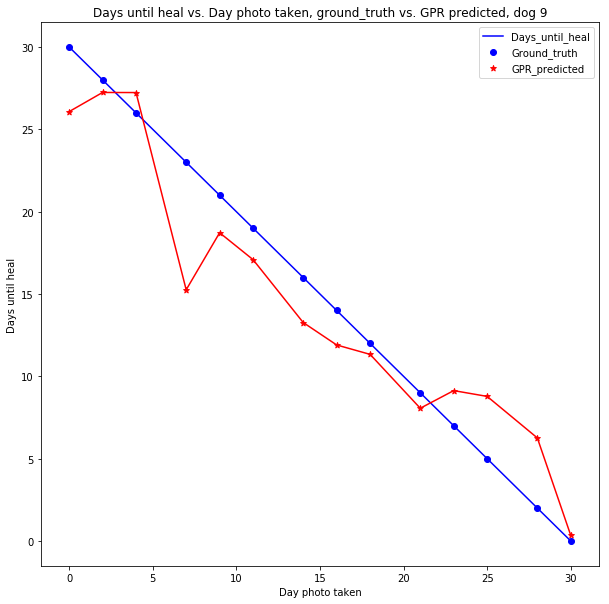

In [72]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = days_seq[14:28] , y = Y_test[14:28], color = 'blue', marker = 'o', label = "Ground_truth")
plt.plot(days_seq[14:28] , Y_test[14:28], linestyle='solid',color='blue')#, label='Ground_truth')

plt.scatter(x = days_seq[14:28] , y = Y_pred[14:28], color = 'red', marker = '*', label = "GPR_predicted")
plt.plot(days_seq[14:28] , Y_pred[14:28], linestyle='solid',color='red')#, label='GPR_predicted')

plt.title("Days until heal vs. Day photo taken, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Day photo taken")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
fig.savefig(fig_path + "ground_truth vs. GPR predicted,dog {},days until heal,connected_lines, 180rotation_images.png".format(test_num))

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


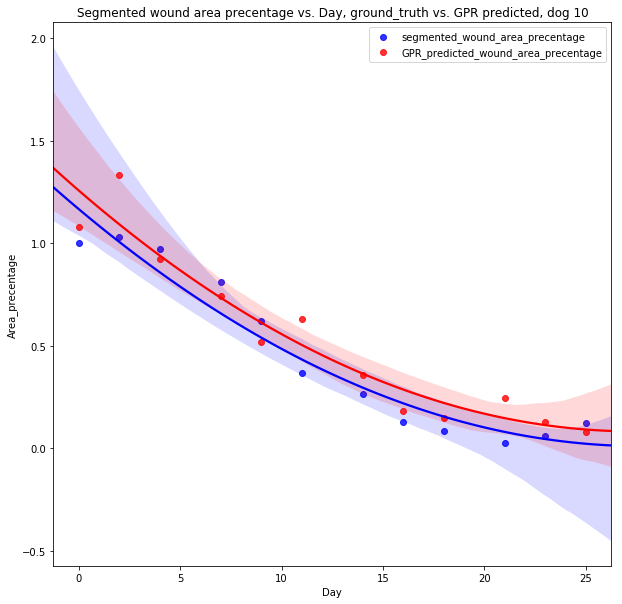

In [47]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=days_seq , y=Y_test, order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=days_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_wound_area_precentage', ax=ax)

ax.set(title='Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

fig.savefig(fig_path + "ground_truth vs. GPR predicted, dog {}, poly2_regression.png".format(test_num))

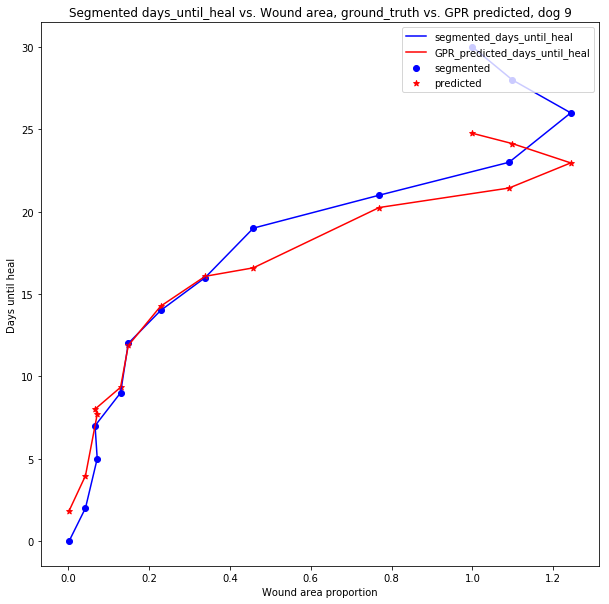

In [12]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = Area_prop_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
plt.plot(Area_prop_seq , Y_test, linestyle='solid',color='blue', label='segmented_days_until_heal')

plt.scatter(x = Area_prop_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
plt.plot(Area_prop_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_days_until_heal')

plt.title("Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Wound area proportion")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, connected_lines.png".format(test_num))

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


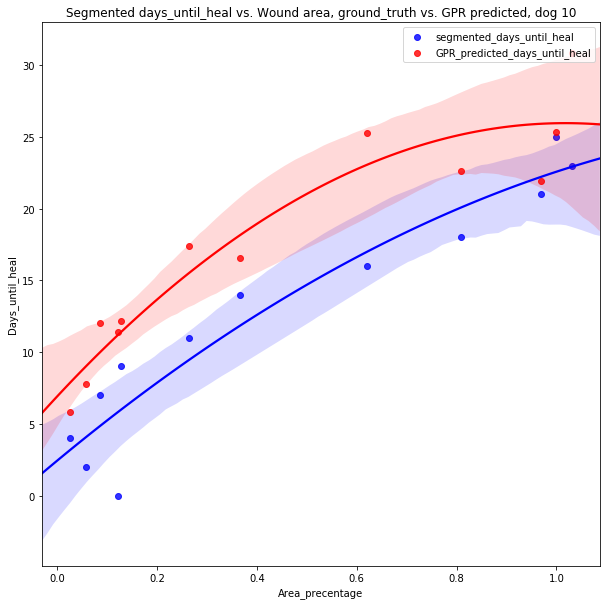

In [24]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=Area_prop_seq , y=Y_test, order = 2,
            color='blue', label='segmented_days_until_heal', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=Area_prop_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_days_until_heal', ax=ax)

ax.set(title='Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, poly2_regression.png".format(test_num))

### Part 2 plots
connected line and poly-2 regression line

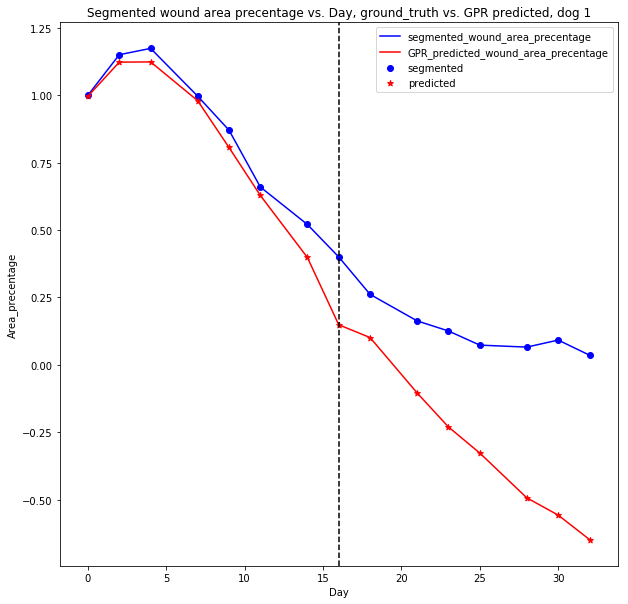

In [90]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

#fig, ax = plt.subplots(figsize=(10,10))

#plt.scatter(x = days_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
#plt.plot(days_seq , Y_test, linestyle='solid',color='blue', label='segmented_wound_area_precentage')

#plt.scatter(x = days_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
#plt.plot(days_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_wound_area_precentage')

#plt.axvline(x = 16, linestyle = '--', c = 'black')

#plt.title("Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}".format(test_num))
#plt.xlabel("Day")
#plt.ylabel("Area_precentage")
#ax.legend(loc='upper right')
#plt.show()

#fig.tight_layout()
#fig.savefig(fig_path + "(Train on < 16 days' all wound sequences)ground_truth vs. GPR predicted, dog {}, connected_lines.png".format(test_num))